Ziel
* Visualsierung der Daten auf iPhone
* Warnung vor risikoreichen Kreuzungen

ToDo
* Daten einlesen
* erste summary statistics


In [29]:
install.packages("stringr")


The downloaded binary packages are in
	/var/folders/sh/hzrmdlcn5551351hrwr1ph300000gn/T//RtmpjGEUh5/downloaded_packages


In [31]:
# install.packages("tidyr")
require("tidyr")
require("data.table")
require("ggplot2")
require("stringr")


Loading required package: stringr


In [13]:
df <- fread(paste0(getwd(), "/data/out/accidents_list_2016.csv"), stringsAsFactors = TRUE)

In [14]:
summary(df)

             street         count             year       directorate   
 BERLINER STR.  :   5   Min.   : 1.000   Min.   :2016   Min.   :11.00  
 KÖPENICKER STR.:   5   1st Qu.: 1.000   1st Qu.:2016   1st Qu.:24.00  
 BAHNHOFSTR.    :   4   Median : 1.000   Median :2016   Median :41.00  
 BERNAUER STR.  :   4   Mean   : 1.963   Mean   :2016   Mean   :38.89  
 BISMARCKSTR.   :   4   3rd Qu.: 2.000   3rd Qu.:2016   3rd Qu.:53.00  
 EISENACHER STR.:   4   Max.   :31.000   Max.   :2016   Max.   :66.00  
 (Other)        :3785                                                  
      lat             lng            features   
 Min.   :13.11   Min.   :52.37   4389412 :   4  
 1st Qu.:13.33   1st Qu.:52.48   4403863 :   4  
 Median :13.39   Median :52.51   4585103 :   4  
 Mean   :13.39   Mean   :52.51   4615457 :   4  
 3rd Qu.:13.45   3rd Qu.:52.54   26285557:   3  
 Max.   :13.71   Max.   :52.67   4067949 :   3  
                                 (Other) :3789  

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


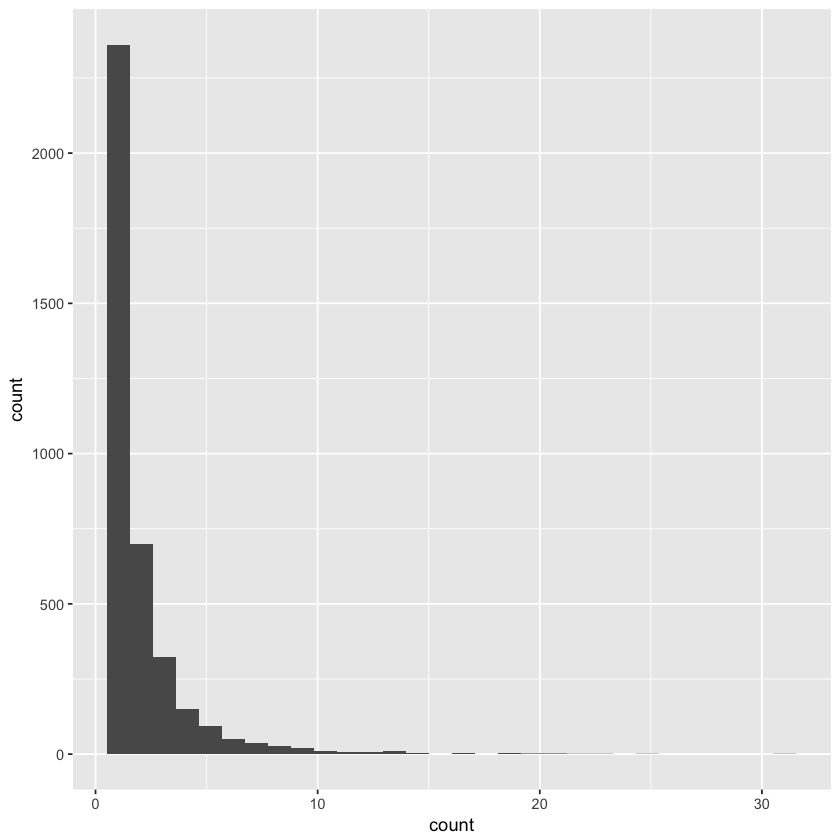

In [18]:
ggplot(data = df, mapping = aes(x = count)) +
    geom_histogram()

In [35]:
str_count(df$street, "/")

[1] 0 2 1 0 1 2 3 0 3 0 1 1 2 0 1 4 1 2 3 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1
  [38] 1 1 0 0 1 2 1 1 1 1 0 1 1 1 3 0 2 1 1 1 1 0 1 0 0 0 1 0 1 2 3 3 2 0 2 2 1
  [75] 1 0 1 0 0 1 0 0 0 2 1 0 1 0 1 0 0 0 0 0 0 0 0 1 3 0 1 2 1 0 1 2 2 1 1 2 1
 [112] 1 1 0 1 1 1 2 1 0 2 0 2 2 1 2 2 1 1 1 0 1 1 1 1 2 0 1 1 1 0 1 1 0 1 0 0 1
 [149] 2 0 0 0 1 0 1 1 1 0 0 2 0 1 0 0 1 1 0 0 2 0 0 1 1 1 0 1 1 0 0 1 2 2 0 0 1
 [186] 1 2 0 0 0 0 1 0 0 1 2 1 0 2 2 0 0 1 1 3 2 2 1 1 2 1 1 1 0 1 2 1 1 1 1 1 2
 [223] 0 0 1 0 1 0 3 1 0 1 1 2 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 3 1 1 2 1 2 0 1
 [260] 0 1 1 2 1 0 1 0 0 1 0 1 2 2 0 0 2 0 1 1 1 0 0 2 0 0 0 1 2 0 0 1 1 1 0 1 0
 [297] 3 0 0 1 0 0 0 0 0 2 0 0 0 1 0 0 0 1 0 0 1 0 2 3 0 2 0 3 0 0 3 1 2 1 0 0 0
 [334] 1 0 0 0 0 1 1 2 0 2 1 1 3 0 0 1 1 0 2 1 1 0 3 1 0 0 0 1 1 1 0 1 0 1 2 0 1
 [371] 0 3 1 0 0 1 1 2 0 1 1 0 1 1 0 1 1 0 1 2 1 0 0 1 0 0 1 1 0 2 0 0 0 1 0 1 0
 [408] 1 1 0 0 2 2 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 4 2 1
 [445] 1 0 0 2 1 0 1 2 0 2 0 1 1 2 2 2 1 0 0 0 1 2 0 3 2 0 1 0 4 2 2 0 1 1 1 1 0
 [482] 1 0 1 2 1 0 2 2 1 1 1 2 2 0 1 0 1 0 1 0 1 2 1 0 0 3 2 0 3 0 1 0 1 0 1 1 0
 [519] 0 0 2 0 1 0 1 0 0 0 0 1 2 0 0 0 0 1 1 1 0 0 0 1 2 1 0 1 1 0 0 2 1 1 2 0 0
 [556] 2 1 1 1 0 2 1 0 2 1 1 2 1 1 1 0 1 0 2 1 1 1 2 3 0 1 1 0 0 0 1 3 1 1 1 1 1
 [593] 2 1 0 1 2 1 1 1 0 1 0 4 0 0 1 0 2 0 0 1 0 1 1 0 0 1 1 4 1 1 2 0 0 3 3 1 2
 [630] 0 0 0 2 1 4 1 2 0 0 1 1 2 1 3 0 2 1 2 0 1 0 0 2 1 2 1 2 1 1 1 0 2 0 0 2 2
 [667] 0 2 2 1 1 1 1 0 3 2 0 0 1 2 0 0 0 2 2 0 1 1 0 1 0 0 1 0 2 1 0 1 1 1 1 1 0
 [704] 1 1 0 2 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 2 0 2 0 1
 [741] 1 1 1 1 0 1 1 0 0 1 0 2 0 3 0 0 2 2 1 2 2 1 2 1 2 0 2 1 2 1 0 1 1 1 1 4 0
 [778] 0 0 3 1 4 4 2 1 0 2 1 2 0 1 3 0 1 2 0 1 0 3 0 0 0 0 0 1 3 0 0 1 2 1 0 2 0
 [815] 0 2 1 2 0 1 1 0 1 0 0 1 1 1 3 1 0 2 0 2 2 1 0 1 1 2 1 1 1 1 1 1 1 0 0 0 1
 [852] 1 1 2 0 2 1 1 1 2 2 0 0 1 3 0 2 0 2 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 4 2
 [889] 0 0 1 2 1 0 0 0 0 0 2 0 0 1 3 1 1 2 1 1 1 2 2 0 1 0 2 0 2 2 0 1 0 1 0 3 1
 [926] 0 1 0 1 2 0 1 1 1 1 0 1 1 1 0 1 2 3 1 0 1 0 2 1 1 0 2 0 2 2 2 0 1 1 0 1 0
 [963] 0 0 2 0 2 1 1 1 1 1 0 3 0 1 0 1 0 0 1 4 0 1 1 0 0 0 4 0 1 1 0 1 1 0 0 0 0
[1000] 0 1 0 1 0 0 0 0 1 2 1 0 2 0 2 2 0 1 0 0 1 0 0 1 2 1 1 0 1 1 1 0 1 1 0 2 0
[1037] 3 1 2 0 0 3 0 1 1 1 1 0 2 0 0 1 0 1 0 0 0 2 2 1 2 0 1 0 0 1 0 1 1 1 1 1 0
[1074] 1 1 0 1 2 1 1 1 0 1 1 1 1 0 1 2 1 2 1 0 1 1 0 0 1 0 1 0 2 0 0 0 0 0 1 0 0
[1111] 0 1 0 0 0 0 0 0 1 1 0 1 1 0 2 1 0 2 1 0 1 0 2 1 1 1 0 1 1 2 2 1 2 1 1 2 1
[1148] 0 3 2 1 2 3 1 0 1 0 2 0 2 1 0 1 1 1 0 0 2 2 0 2 1 0 1 0 2 0 3 1 0 1 1 2 1
[1185] 1 0 0 3 1 1 1 1 2 2 2 1 1 0 0 1 2 0 2 1 0 0 0 0 1 0 0 0 1 0 1 1 2 1 0 1 2
[1222] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 2 3 1 2 0 1 2
[1259] 2 1 1 0 2 1 1 0 2 0 1 2 4 1 1 2 0 4 1 2 1 1 1 1 1 0 1 1 0 2 0 1 1 1 1 0 1
[1296] 3 0 1 1 0 2 0 0 1 1 2 1 0 1 1 1 2 1 1 1 1 0 1 1 0 0 1 0 1 0 2 2 0 0 0 1 0
[1333] 1 0 0 1 0 0 0 0 1 0 1 0 0 0 3 1 2 0 0 0 1 1 1 0 0 1 0 0 1 2 2 2 1 1 0 3 0
[1370] 2 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 3 0 1 0 1 1 1 1 1 1 2 1 1 0 1 0 1 1 1 0 3
[1407] 2 1 2 3 0 0 0 1 2 0 1 1 1 1 1 1 1 1 1 3 1 1 1 0 2 0 1 2 0 3 2 0 2 0 0 1 2
[1444] 1 1 0 1 1 0 1 1 0 0 1 2 1 1 1 2 0 0 0 1 1 3 1 1 0 1 1 1 1 1 0 1 1 0 2 0 1
[1481] 0 1 1 1 1 1 0 0 1 2 1 1 1 3 0 2 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 3 0 0 0 0 0
[1518] 1 1 0 1 0 0 1 0 2 1 1 1 2 1 1 1 2 1 0 2 2 1 2 3 0 2 3 1 3 1 1 1 1 1 0 2 1
[1555] 1 2 2 2 0 1 1 2 1 0 0 1 2 0 0 0 2 1 1 0 0 3 0 2 2 1 0 1 1 2 1 1 3 1 0 1 1
[1592] 1 0 0 1 1 0 1 0 1 1 4 0 0 1 0 1 1 2 1 1 1 1 0 2 3 0 1 1 1 0 1 1 4 2 2 2 2
[1629] 2 2 1 1 1 1 0 2 0 3 0 1 1 1 0 0 3 3 0 1 1 2 0 1 2 1 1 1 1 0 1 1 0 1 1 0 3
[1666] 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 2 1 1 0
[1703] 2 2 0 2 2 0 0 1 0 0 1 0 1 0 1 4 0 1 1 0 2 2 1 2 1 0 1 3 1 0 2 0 2 0 1 2 1
[1740] 0 1 0 1 0 0 1 1 0 1 2 1 2 2 1 1 0 1 2 2 1 1 1 2 1 2 0 0 2 1 0 3 0 1 2 2 1
[1777] 1 0 0 0 3 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 2 1 4 1 2 1 0 0 1 2 1 0 1 1
[1814] 0 0 2 1 0 1 0 1 2 0 1 1 0 0

In [36]:
temp <- df %>%
    mutate(
        crossing = if_else(str_count(df$street, "/") > 0, 1, 0)
    )

ERROR: Error in mutate(., crossing = if_else(str_count(df$street, "/") > 0, 1, : could not find function "mutate"
